In [9]:
# CONFIGURATION

db = 'semparse_cdr_lite'
PARALLELISM = 1
MAX_DOCS = 1500
SPLITS = 3

# LFs
SOURCE = 'py'
INCLUDE = []
MAX_LFS = None

# Supervision
MODEL_DEP = True
MAJORITY_VOTE = False
TRADITIONAL = False
DISPLAY_CORRELATION = True
EMPIRICAL_FROM_TRAIN = False

# Discriminative
SEARCH_N = 1
N_EPOCHS = 5
LR = 0.01
L1_PENALTY = 0.0
L2_PENALTY = 0.0
PRINT_FREQ = 5

In [10]:
import os

# os.environ['SNORKELDB'] = 'postgres://localhost:5432/' + db

from snorkel import SnorkelSession
session = SnorkelSession()

In [3]:
from snorkel.models import candidate_subclass
ChemicalDisease = candidate_subclass('ChemicalDisease', ['chemical', 'disease'])

In [11]:
from snorkel.semantic import CDRModel
sm = CDRModel(session,\
              candidate_class=ChemicalDisease,\
              traditional=TRADITIONAL,\
              splits=SPLITS,\
              parallelism=PARALLELISM)

In [ ]:
%time sm.parse(max_docs=MAX_DOCS)

In [ ]:
%time sm.extract()

In [ ]:
%time sm.load_gold()

In [ ]:
%time sm.featurize()

In [12]:
%time sm.generate_lfs(source=SOURCE, include=INCLUDE, max_lfs=MAX_LFS)

CPU times: user 17 µs, sys: 1 µs, total: 18 µs
Wall time: 21 µs


In [13]:
%time sm.label()

Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 0: (8272,34) sparse (nnz = 25549)
LF Summary Statistics: 34 LFs applied to 8272 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		95.10%
Overlap (candidates w/ > 1 labels):		79.53%
Conflict (candidates w/ conflicting labels):	55.33%
Redundancy (labels per candidate (avg)):	3.1
Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 1: (888,34) sparse (nnz = 2717)
LF Summary Statistics: 34 LFs applied to 888 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		91.67%
Overlap (candidates w/ > 1 labels):		78.15%
Conflict (candidates w/ conflicting labels):	53.83%
Redundancy (labels per candidate (avg)):	3.1
Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 2: (4620,34) sparse (nnz = 140

DEP_REINFORCING : (LF_ctd_unspecified_induce, LF_induce_name)


/Users/bradenjh/repos/snorkel/snorkel/annotations.py:80: RuntimeWarning: invalid value encountered in divide
  ac = (tp+tn).astype(float) / (tp+tn+fp+fn)


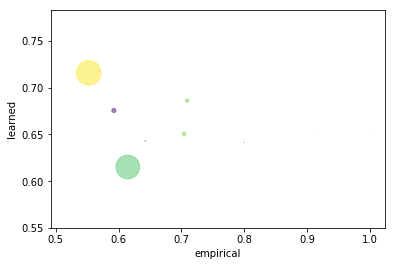

Saved 8272 training marginals


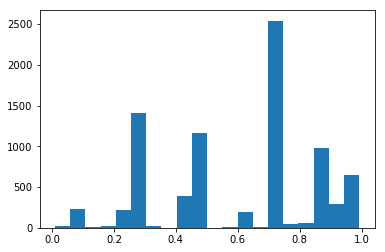

CPU times: user 17.8 s, sys: 235 ms, total: 18 s
Wall time: 18.3 s


In [7]:
%time sm.supervise(model_dep=MODEL_DEP,\
                   majority_vote=MAJORITY_VOTE,\
                   display_correlation=DISPLAY_CORRELATION,\
                   empirical_from_train=EMPIRICAL_FROM_TRAIN)

[SparseLR] lr=0.01 l1=0.0 l2=0.0
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=7114  #epochs=5  batch size=100
[SparseLR] Epoch 0 (2.17s)	Avg. loss=0.670622	NNZ=122840
[SparseLR] Epoch 4 (10.02s)	Avg. loss=0.604083	NNZ=122840
[SparseLR] Training done (10.02s)

Dev:
EVAL MARGINALS:


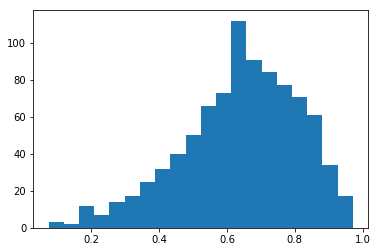

Scores (Un-adjusted)
Pos. class accuracy: 0.892
Neg. class accuracy: 0.243
Precision            0.371
Recall               0.892
F1                   0.524
----------------------------------------
TP: 264 | FP: 448 | TN: 144 | FN: 32


Calibration plot:


/Users/bradenjh/anaconda/envs/snorkel/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bradenjh/anaconda/envs/snorkel/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


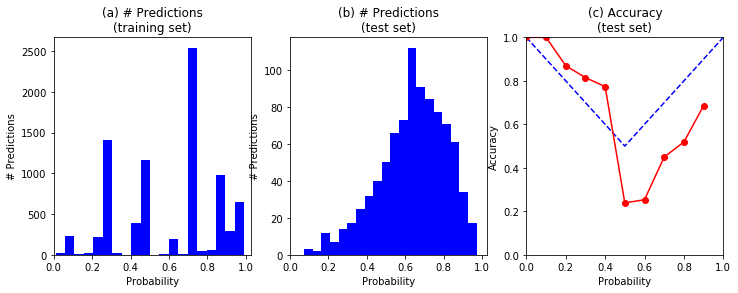


Test:
EVAL MARGINALS:


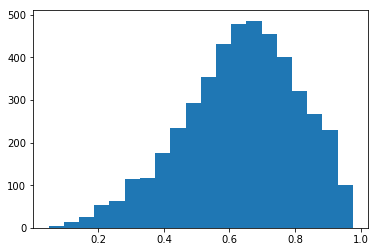

Scores (Un-adjusted)
Pos. class accuracy: 0.89
Neg. class accuracy: 0.274
Precision            0.372
Recall               0.89
F1                   0.525
----------------------------------------
TP: 1340 | FP: 2260 | TN: 855 | FN: 165


Calibration plot:


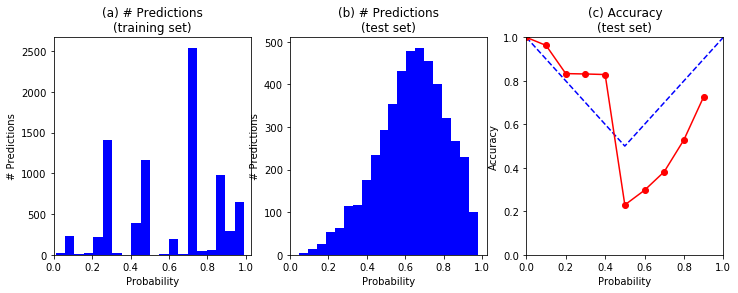

In [8]:
%time sm.classify(model='logreg', search_n=SEARCH_N, n_epochs=N_EPOCHS,\
            lr=LR, l1_penalty=L1_PENALTY, l2_penalty=L2_PENALTY,\
            print_freq=PRINT_FREQ)